# 1 . Probing GPT-2 on Sentiment Classification

In [ ]:
# Install required libraries
!pip install transformers torch datasets scikit-learn matplotlib

In [2]:
# Import required libraries
import torch
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set padding token as eos_token
tokenizer.pad_token = tokenizer.eos_token

# Load GPT-2 model
model = GPT2Model.from_pretrained(model_name)

# Set model to evaluation mode
model.eval()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2SdpaAttention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [20]:
# Load IMDb dataset
dataset = load_dataset("imdb")

# Shuffle the dataset to get a random mix of both labels
train_data = dataset['train'].shuffle(seed=42).select(range(1000))
test_data = dataset['test'].shuffle(seed=42).select(range(1000))

# Extract text and labels for training and testing
train_texts = train_data['text']
train_labels = train_data['label']
test_texts = test_data['text']
test_labels = test_data['label']

In [22]:
# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors="pt", max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors="pt", max_length=128)

In [23]:
# Function to extract hidden states
def extract_hidden_states(encodings):
    with torch.no_grad():
        outputs = model(input_ids=encodings['input_ids'], attention_mask=encodings['attention_mask'])
        hidden_states = outputs.last_hidden_state  # (batch_size, sequence_length, hidden_size)
        cls_embeddings = hidden_states[:, 0, :]  # Use the embedding of the first token (CLS token) as features
        return cls_embeddings.numpy()


In [24]:
# Extract hidden states for training and testing sets
train_features = extract_hidden_states(train_encodings)
test_features = extract_hidden_states(test_encodings)

In [25]:
# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(train_features, train_labels)

LogisticRegression(max_iter=1000)

In [26]:
# Predict on the test set
test_preds = clf.predict(test_features)

# Evaluate the classifier with classification report
print("Classification Report:\n", classification_report(test_labels, test_preds))

# Evaluate with accuracy score
accuracy = accuracy_score(test_labels, test_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57       512
           1       0.52      0.45      0.49       488

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000

Accuracy: 53.30%


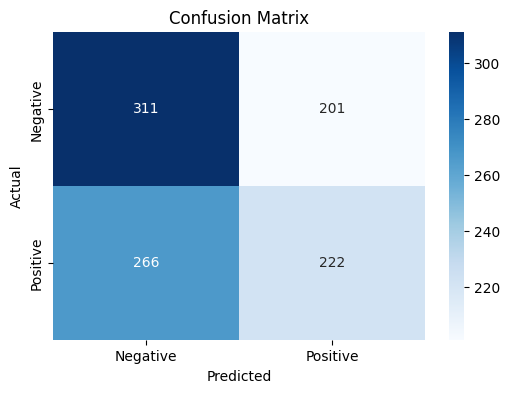

In [27]:
# Confusion Matrix for visualization
cm = confusion_matrix(test_labels, test_preds)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2 . Probing BERT on Sentiment Classification

Note: As the GPT models were not inteded for sentiment Analysis, we will try encoder only model like BERT to check whether it yields a better result.

In [34]:
# Import required libraries
import torch
from transformers import BertTokenizer, BertModel  # Fix the import for BertTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       512
           1       0.74      0.78      0.76       488

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000

Accuracy: 75.90%


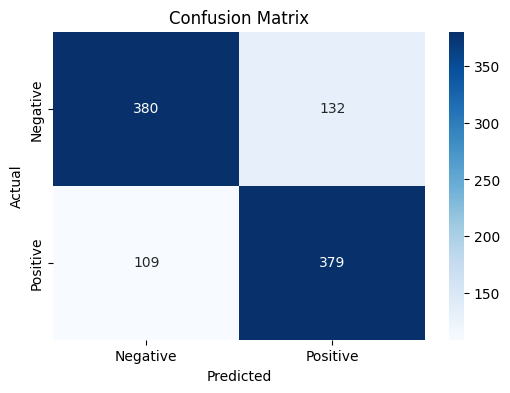

In [35]:
# Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Set model to evaluation mode
model.eval()

# Load IMDb dataset
dataset = load_dataset("imdb")

# Shuffle the dataset to get a random mix of both labels
train_data = dataset['train'].shuffle(seed=42).select(range(1000))  # Randomly select 1000 examples from shuffled data
test_data = dataset['test'].shuffle(seed=42).select(range(1000))    # Randomly select 1000 examples from shuffled data

# Extract text and labels for training and testing
train_texts = train_data['text']
train_labels = train_data['label']
test_texts = test_data['text']
test_labels = test_data['label']

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors="pt", max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors="pt", max_length=128)

# Function to extract hidden states from BERT
def extract_hidden_states(encodings):
    with torch.no_grad():
        outputs = model(input_ids=encodings['input_ids'], attention_mask=encodings['attention_mask'])
        hidden_states = outputs.last_hidden_state  # (batch_size, sequence_length, hidden_size)
        cls_embeddings = hidden_states[:, 0, :]  # Use the embedding of the first token ([CLS] token) as features
        return cls_embeddings.numpy()

# Extract hidden states for training and testing sets
train_features = extract_hidden_states(train_encodings)
test_features = extract_hidden_states(test_encodings)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(train_features, train_labels)

# Predict on the test set
test_preds = clf.predict(test_features)

# Evaluate the classifier with classification report
print("Classification Report:\n", classification_report(test_labels, test_preds))

# Evaluate with accuracy score
accuracy = accuracy_score(test_labels, test_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix for visualization
cm = confusion_matrix(test_labels, test_preds)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1]:
53.3
75.9

75.9

<ipython-input-6-02fa4234f5c9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=data,palette=colors)


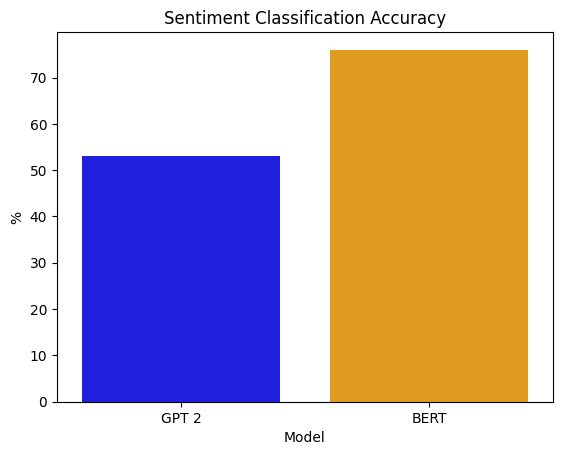

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = pd.DataFrame({
    'Model': ['GPT 2', 'BERT'],
    'Accuracy': [53, 76]
})

colors = ['blue', 'orange']

# Plot
sns.barplot(x='Model', y='Accuracy', data=data,palette=colors)

# Add labels and title
plt.title('Sentiment Classification Accuracy')
plt.ylabel('%')
plt.xlabel('Model')

# Show plot
plt.show()